## 4.1 使用决策树实现基本的分裂

In [6]:
# 生成准备的分类数据
import numpy as np 
from sklearn import datasets
X,y = datasets.make_classification(n_samples=1000,n_features=3,n_redundant=0)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)
preds = dt.predict(X)

n_features=200
X,y = datasets.make_classification(750,n_features,n_informative=5)

training = np.random.choice([True,False],p=[.75,.25],size=len(y))
testing = ~training
accuracies = []

# 使用不同深度的决策树，看accuracies变化
for x in np.arange(1,n_features+1):
    dt = DecisionTreeClassifier(max_depth=x)
    dt.fit(X[training],y[training])
    preds = dt.predict(X[testing])
    accuracies.append((preds==y[testing]).mean())


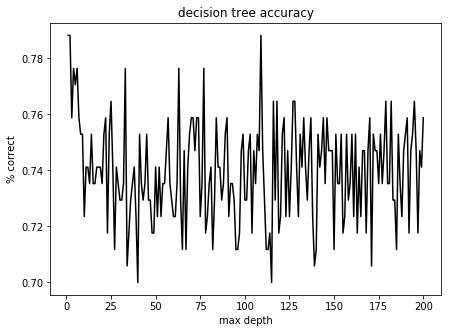

In [8]:
# 绘制结果图像
import matplotlib.pyplot as plt 
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(range(1,n_features+1),accuracies,color='k')
ax.set_title("decision tree accuracy")
ax.set_ylabel("% correct")
ax.set_xlabel("max depth")
plt.show()

Text(0.5, 0, 'max depth')

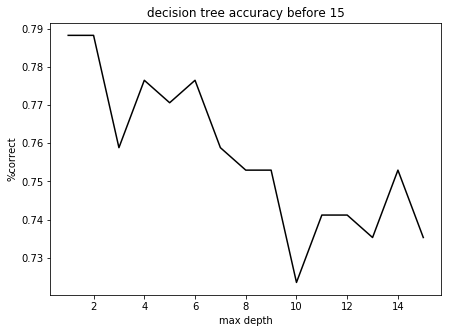

In [10]:
N = 15
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(range(1,n_features+1)[:N],accuracies[:N],color='k')
ax.set_title("decision tree accuracy before 15")
ax.set_ylabel("%correct")
ax.set_xlabel("max depth")

## 4.2 调整决策树模型

In [15]:
from sklearn import datasets 
X, y = datasets.make_classification(1000, 20, n_informative=3)
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier() 
dt.fit(X, y) 

from io import StringIO
from sklearn import tree
import pydot
str_buffer = StringIO()
tree.export_graphviz(dt,out_file=str_buffer)
graph = pydot.graph_from_dot_data(str_buffer.ge)
graph.write("myfile.jpg")

ModuleNotFoundError: No module named 'pydot'